## Yelp Review Dataset

In [69]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [70]:
reviews_df = pd.read_csv('yelp_review.csv')

In [71]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5261668 entries, 0 to 5261667
Data columns (total 9 columns):
 #   Column       Dtype 
---  ------       ----- 
 0   review_id    object
 1   user_id      object
 2   business_id  object
 3   stars        int64 
 4   date         object
 5   text         object
 6   useful       int64 
 7   funny        int64 
 8   cool         int64 
dtypes: int64(4), object(5)
memory usage: 361.3+ MB


In [72]:
reviews_df.head()

,review_id,user_id,business_id,stars,date,text,useful,funny,cool
0,vkVSCC7xljjrAI4UGfnKEQ,bv2nCi5Qv5vroFiqKGopiw,AEx2SYEUJmTxVVB18LlCwA,5,2016-05-28,Super simple place but amazing nonetheless. It...,0,0,0
1,n6QzIUObkYshz4dz2QRJTw,bv2nCi5Qv5vroFiqKGopiw,VR6GpWIda3SfvPC-lg9H3w,5,2016-05-28,Small unassuming place that changes their menu...,0,0,0
2,MV3CcKScW05u5LVfF6ok0g,bv2nCi5Qv5vroFiqKGopiw,CKC0-MOWMqoeWf6s-szl8g,5,2016-05-28,Lester's is located in a beautiful neighborhoo...,0,0,0
3,IXvOzsEMYtiJI0CARmj77Q,bv2nCi5Qv5vroFiqKGopiw,ACFtxLv8pGrrxMm6EgjreA,4,2016-05-28,Love coming here. Yes the place always needs t...,0,0,0
4,L_9BTb55X0GDtThi6GlZ6w,bv2nCi5Qv5vroFiqKGopiw,s2I_Ni76bjJNK9yG60iD-Q,4,2016-05-28,Had their chocolate almond croissant and it wa...,0,0,0


## Yelp Business Dataset

In [73]:
business_csv = pd.read_csv('yelp_business.csv')

In [74]:
business_csv.state.unique()

array(['AZ', 'PA', 'OH', 'BW', 'NV', 'ON', 'NC', 'WI', 'SC', 'QC', 'IL',
       'MLN', 'EDH', 'FIF', 'CHE', 'CO', 'NYK', 'NE', 'HLD', 'WLN', 'ABE',
       'WA', 'SCB', 'KHL', 'ESX', 'CMA', 'FAL', 'ELN', 'NY', 'PKN', 'ST',
       '01', 'CA', 'NLK', 'GLG', 'C', 'VS', 'IN', 'XGL', 'AL', 'STG',
       'VT', 'CS', '30', 'AR', 'SL', 'NI', 'BY', 'AK', 'FLN', nan, 'FL',
       'MN', '6', 'NTH', 'MT', 'B', 'GA', 'VA', 'DE', 'AB', 'HU', 'KY',
       '3', 'TAM', 'ZET', 'RCC', 'WHT'], dtype=object)

In [75]:
business_list = business_csv.city.unique().tolist()

Filter businesses according to city, review count and stars

In [143]:
# function to filter businesses according to city, review count and stars
def filter_business(df, city, review_count, stars):
    filtered_df = df[(df['city'] == city) & (df['categories'].str.contains("Restaurants"))
                               & (df['review_count'] > review_count)
                               & (df['stars'] >= stars)]
    return filtered_df

In [203]:
restaurants_lasvegas = filter_business(business_csv, city = 'Toronto', review_count = 500, stars = 3)
restaurants_lasvegas

,business_id,name,neighborhood,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,categories
5191,RwRNR4z3kY-4OsFqigY5sw,"""Uncle Tetsu's Japanese Cheesecake""",Downtown Core,"""598 Bay Street""",Toronto,ON,M5G 1M5,43.655969,-79.384013,3.5,848,1,Food;Desserts;Bakeries;Japanese;Restaurants
9526,RtUvSWO_UZ8V3Wpj0n077w,"""KINKA IZAKAYA ORIGINAL""",Downtown Core,"""398 Church St""",Toronto,ON,M5B 2A2,43.660524,-79.378927,4.0,1184,1,Tapas Bars;Japanese;Nightlife;Tapas/Small Plat...
16966,O-uIEuv7JLUHajkemx_sVw,"""Beerbistro""",Downtown Core,"""18 King Street E""",Toronto,ON,M5C 1C4,43.649817,-79.377147,4.0,546,1,American (New);Pubs;Restaurants;Nightlife;Bars...
18409,mG71gQ5HWl7ut9OCN6NJKA,"""360 Restaurant""",Entertainment District,"""CN Tower, 301 Front Street W""",Toronto,ON,M5V 2T6,43.642768,-79.387100,3.5,627,1,American (New);Restaurants;Vegetarian;Canadian...
19731,mZRKH9ngRY92bI_irrHq6w,"""Richmond Station""",Downtown Core,"""1 Richmond Street W""",Toronto,ON,M5H 3W4,43.651373,-79.379285,4.5,515,1,Canadian (New);Restaurants
31522,MS-hfug4QDXqb_Mws3qlzA,"""Grand Electric""",Parkdale,"""1330 Queen Street W""",Toronto,ON,M6K 1L4,43.641675,-79.431608,4.0,586,1,Bars;Nightlife;Restaurants;Mexican
31703,DE89UdHFMCN6DtYWZuer5A,"""Hokkaido Ramen Santouka""",Ryerson,"""91 Dundas Street E""",Toronto,ON,M5B 2C8,43.656322,-79.377500,4.0,651,1,Noodles;Restaurants;Japanese;Ramen
36440,f5O7v_X_jCg2itqacRfxhg,"""Sansotei Ramen""",Downtown Core,"""179 Dundas Street W""",Toronto,ON,M5G 1Z8,43.655004,-79.386473,4.0,701,1,Ramen;Japanese;Restaurants;Noodles
40895,O1TvPrgkK2bUo5O5aSZ7lw,"""Rol San""",Chinatown,"""323 Spadina Avenue""",Toronto,ON,M5T 2E9,43.654353,-79.398313,3.5,539,1,Dim Sum;Chinese;Restaurants
49153,-av1lZI1JDY_RZN2eTMnWg,"""Salad King Restaurant""",Downtown Core,"""340 Yonge Street""",Toronto,ON,M5B 1R8,43.657648,-79.381728,3.5,808,1,Restaurants;Thai


In [204]:
restaurants_lasvegas.neighborhood.unique()

array(['Downtown Core', 'Entertainment District', 'Parkdale', 'Ryerson',
       'Chinatown', nan, 'Distillery District', 'Liberty Village',
       'Kensington Market', 'Financial District', 'Wychwood',
       'Queen Street West'], dtype=object)

Check for unique categories in las vegas restaurants

In [205]:
restaurants_lasvegas.categories.tolist()

results = []

for i in restaurants_lasvegas.categories.tolist():
    results.extend(i.split(";"))
set(results)

{'American (New)',
 'American (Traditional)',
 'Asian Fusion',
 'Bakeries',
 'Barbeque',
 'Bars',
 'Bistros',
 'Breakfast & Brunch',
 'Canadian (New)',
 'Chinese',
 'Comfort Food',
 'Delicatessen',
 'Desserts',
 'Dim Sum',
 'Ethnic Food',
 'Event Planning & Services',
 'Food',
 'German',
 'Italian',
 'Japanese',
 'Korean',
 'Lounges',
 'Mediterranean',
 'Mexican',
 'Middle Eastern',
 'Nightlife',
 'Noodles',
 'Pubs',
 'Ramen',
 'Restaurants',
 'Sandwiches',
 'Seafood',
 'Soup',
 'Southern',
 'Specialty Food',
 'Sushi Bars',
 'Tapas Bars',
 'Tapas/Small Plates',
 'Thai',
 'Vegetarian',
 'Venues & Event Spaces',
 'Vietnamese'}

Check for las vegas restaurants with NA values for categories

In [206]:
lasvegas_no_na_subset = restaurants_lasvegas[~restaurants_lasvegas['neighborhood'].isna()]
lasvegas_no_na_subset

,business_id,name,neighborhood,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,categories
5191,RwRNR4z3kY-4OsFqigY5sw,"""Uncle Tetsu's Japanese Cheesecake""",Downtown Core,"""598 Bay Street""",Toronto,ON,M5G 1M5,43.655969,-79.384013,3.5,848,1,Food;Desserts;Bakeries;Japanese;Restaurants
9526,RtUvSWO_UZ8V3Wpj0n077w,"""KINKA IZAKAYA ORIGINAL""",Downtown Core,"""398 Church St""",Toronto,ON,M5B 2A2,43.660524,-79.378927,4.0,1184,1,Tapas Bars;Japanese;Nightlife;Tapas/Small Plat...
16966,O-uIEuv7JLUHajkemx_sVw,"""Beerbistro""",Downtown Core,"""18 King Street E""",Toronto,ON,M5C 1C4,43.649817,-79.377147,4.0,546,1,American (New);Pubs;Restaurants;Nightlife;Bars...
18409,mG71gQ5HWl7ut9OCN6NJKA,"""360 Restaurant""",Entertainment District,"""CN Tower, 301 Front Street W""",Toronto,ON,M5V 2T6,43.642768,-79.387100,3.5,627,1,American (New);Restaurants;Vegetarian;Canadian...
19731,mZRKH9ngRY92bI_irrHq6w,"""Richmond Station""",Downtown Core,"""1 Richmond Street W""",Toronto,ON,M5H 3W4,43.651373,-79.379285,4.5,515,1,Canadian (New);Restaurants
31522,MS-hfug4QDXqb_Mws3qlzA,"""Grand Electric""",Parkdale,"""1330 Queen Street W""",Toronto,ON,M6K 1L4,43.641675,-79.431608,4.0,586,1,Bars;Nightlife;Restaurants;Mexican
31703,DE89UdHFMCN6DtYWZuer5A,"""Hokkaido Ramen Santouka""",Ryerson,"""91 Dundas Street E""",Toronto,ON,M5B 2C8,43.656322,-79.377500,4.0,651,1,Noodles;Restaurants;Japanese;Ramen
36440,f5O7v_X_jCg2itqacRfxhg,"""Sansotei Ramen""",Downtown Core,"""179 Dundas Street W""",Toronto,ON,M5G 1Z8,43.655004,-79.386473,4.0,701,1,Ramen;Japanese;Restaurants;Noodles
40895,O1TvPrgkK2bUo5O5aSZ7lw,"""Rol San""",Chinatown,"""323 Spadina Avenue""",Toronto,ON,M5T 2E9,43.654353,-79.398313,3.5,539,1,Dim Sum;Chinese;Restaurants
49153,-av1lZI1JDY_RZN2eTMnWg,"""Salad King Restaurant""",Downtown Core,"""340 Yonge Street""",Toronto,ON,M5B 1R8,43.657648,-79.381728,3.5,808,1,Restaurants;Thai


In [207]:
lasvegas_na_subset = restaurants_lasvegas[restaurants_lasvegas['neighborhood'].isna()]
lasvegas_na_subset

,business_id,name,neighborhood,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,categories
57854,B70iTJjcPkuYn8ouUewWgw,"""Gusto 101""",NaN,"""101 Portland Street""",Toronto,ON,M5V 2N3,43.645002,-79.400309,4.0,673,1,Italian;Restaurants
63728,e41TP5cXZqSrz50xCBJqZw,"""Insomnia Restaurant & Lounge""",NaN,"""563 Bloor Street W""",Toronto,ON,M5S 1Y6,43.665131,-79.410852,4.0,690,1,Nightlife;Bars;Breakfast & Brunch;Comfort Food...
87730,h_4dPV9M9aYaBliH1Eoeeg,"""Wvrst""",NaN,"""609 King Street W""",Toronto,ON,M5V 1M5,43.644186,-79.401015,4.0,623,1,Restaurants;Nightlife;Canadian (New);German;Bars


#### Fill NaN neighborhoods by searching the closest neighborhood from the restaurant

In [208]:
from geopy import distance

lasvegas_na_dict = lasvegas_na_subset.to_dict('records')
lasvegas_no_na_dict = lasvegas_no_na_subset.to_dict('records')

def get_closest_neighborhood(list_restaurants, location):
    # location is tuple of lat and long values
    closest_distance = 100
    closest_neighborhood = ""

    for i,r_dict in enumerate(list_restaurants):
        
        r_lat_long = (r_dict['latitude'], r_dict['longitude'])
        current_distance = distance.distance(location, r_lat_long).km

        # if current iteration of restaurant is closer 
        if current_distance < closest_distance:
            closest_distance = current_distance
            closest_neighborhood = r_dict['neighborhood']
        
    
    print(closest_distance)
    return closest_neighborhood
        

In [209]:
for na_rest in lasvegas_na_dict:
    location = (na_rest['latitude'], na_rest['longitude'])
    na_rest['neighborhood'] = get_closest_neighborhood(lasvegas_no_na_dict, location)

0.5031659807313933
1.4619236228813934
0.6102705119720732


In [210]:
restaurants_lasvegas = pd.DataFrame(lasvegas_na_dict+lasvegas_no_na_dict)
restaurants_lasvegas

,business_id,name,neighborhood,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,categories
0,B70iTJjcPkuYn8ouUewWgw,"""Gusto 101""",Queen Street West,"""101 Portland Street""",Toronto,ON,M5V 2N3,43.645002,-79.400309,4.0,673,1,Italian;Restaurants
1,e41TP5cXZqSrz50xCBJqZw,"""Insomnia Restaurant & Lounge""",Kensington Market,"""563 Bloor Street W""",Toronto,ON,M5S 1Y6,43.665131,-79.410852,4.0,690,1,Nightlife;Bars;Breakfast & Brunch;Comfort Food...
2,h_4dPV9M9aYaBliH1Eoeeg,"""Wvrst""",Queen Street West,"""609 King Street W""",Toronto,ON,M5V 1M5,43.644186,-79.401015,4.0,623,1,Restaurants;Nightlife;Canadian (New);German;Bars
3,RwRNR4z3kY-4OsFqigY5sw,"""Uncle Tetsu's Japanese Cheesecake""",Downtown Core,"""598 Bay Street""",Toronto,ON,M5G 1M5,43.655969,-79.384013,3.5,848,1,Food;Desserts;Bakeries;Japanese;Restaurants
4,RtUvSWO_UZ8V3Wpj0n077w,"""KINKA IZAKAYA ORIGINAL""",Downtown Core,"""398 Church St""",Toronto,ON,M5B 2A2,43.660524,-79.378927,4.0,1184,1,Tapas Bars;Japanese;Nightlife;Tapas/Small Plat...
5,O-uIEuv7JLUHajkemx_sVw,"""Beerbistro""",Downtown Core,"""18 King Street E""",Toronto,ON,M5C 1C4,43.649817,-79.377147,4.0,546,1,American (New);Pubs;Restaurants;Nightlife;Bars...
6,mG71gQ5HWl7ut9OCN6NJKA,"""360 Restaurant""",Entertainment District,"""CN Tower, 301 Front Street W""",Toronto,ON,M5V 2T6,43.642768,-79.387100,3.5,627,1,American (New);Restaurants;Vegetarian;Canadian...
7,mZRKH9ngRY92bI_irrHq6w,"""Richmond Station""",Downtown Core,"""1 Richmond Street W""",Toronto,ON,M5H 3W4,43.651373,-79.379285,4.5,515,1,Canadian (New);Restaurants
8,MS-hfug4QDXqb_Mws3qlzA,"""Grand Electric""",Parkdale,"""1330 Queen Street W""",Toronto,ON,M6K 1L4,43.641675,-79.431608,4.0,586,1,Bars;Nightlife;Restaurants;Mexican
9,DE89UdHFMCN6DtYWZuer5A,"""Hokkaido Ramen Santouka""",Ryerson,"""91 Dundas Street E""",Toronto,ON,M5B 2C8,43.656322,-79.377500,4.0,651,1,Noodles;Restaurants;Japanese;Ramen


Make categories into dummies

In [211]:
category_cols = ['American',
       'Asian Fusion', 'Bakeries', 'Bars', 'Breakfast & Brunch', 'British',
       'Buffets', 'Burgers', 'Caribbean', 'Cafes', 'Caterers', 'Chinese',
       'Desserts', 'French', 'German', 'Gluten-Free', 'Indian', 'Hawaiian',
       'Italian', 'Japanese', 'Korean', 'Latin American', 'Mediterranean',
       'Mexican', 'Music Venues', 'Nightlife', 'Seafood', 'Salad', 'Spanish',
       'Thai', 'Vegan', 'Vegetarian', 'Vietnamese', 'Canadian']

In [212]:
restaurants_lasvegas['categories'].apply(lambda x: x.split(";"))

0                                [Italian, Restaurants]
1     [Nightlife, Bars, Breakfast & Brunch, Comfort ...
2     [Restaurants, Nightlife, Canadian (New), Germa...
3     [Food, Desserts, Bakeries, Japanese, Restaurants]
4     [Tapas Bars, Japanese, Nightlife, Tapas/Small ...
5     [American (New), Pubs, Restaurants, Nightlife,...
6     [American (New), Restaurants, Vegetarian, Cana...
7                         [Canadian (New), Restaurants]
8               [Bars, Nightlife, Restaurants, Mexican]
9               [Noodles, Restaurants, Japanese, Ramen]
10              [Ramen, Japanese, Restaurants, Noodles]
11                      [Dim Sum, Chinese, Restaurants]
12                                  [Restaurants, Thai]
13           [Tapas/Small Plates, Mexican, Restaurants]
14    [Event Planning & Services, Canadian (New), Br...
15                      [Mexican, Restaurants, Seafood]
16    [Food, Ethnic Food, Specialty Food, Restaurant...
17    [American (New), Ramen, Asian Fusion, Rest

In [213]:
original_list = restaurants_lasvegas['categories'].apply(lambda x: x.split(";")).tolist()

In [214]:
original_list = [[s[:-6] if s.endswith('(New)') else s for s in sub_list] for sub_list in original_list]
original_list = [[s[:-14] if s.endswith('(Traditional)') else s for s in sub_list] for sub_list in original_list]
original_list = [list(set(sub_list)) for sub_list in original_list]

In [215]:
original_list

[['Restaurants', 'Italian'],
 ['Comfort Food',
  'Breakfast & Brunch',
  'Mediterranean',
  'Lounges',
  'Restaurants',
  'Bars',
  'Nightlife'],
 ['Canadian', 'German', 'Restaurants', 'Bars', 'Nightlife'],
 ['Food', 'Bakeries', 'Restaurants', 'Desserts', 'Japanese'],
 ['Tapas Bars',
  'Pubs',
  'Tapas/Small Plates',
  'Restaurants',
  'Bars',
  'Nightlife',
  'Japanese'],
 ['Pubs',
  'Canadian',
  'Bistros',
  'American',
  'Restaurants',
  'Bars',
  'Nightlife'],
 ['Vegetarian', 'Restaurants', 'Canadian', 'American'],
 ['Restaurants', 'Canadian'],
 ['Mexican', 'Restaurants', 'Bars', 'Nightlife'],
 ['Restaurants', 'Ramen', 'Noodles', 'Japanese'],
 ['Restaurants', 'Ramen', 'Noodles', 'Japanese'],
 ['Dim Sum', 'Restaurants', 'Chinese'],
 ['Restaurants', 'Thai'],
 ['Mexican', 'Restaurants', 'Tapas/Small Plates'],
 ['Venues & Event Spaces',
  'Canadian',
  'Comfort Food',
  'Vegetarian',
  'Breakfast & Brunch',
  'Event Planning & Services',
  'American',
  'Restaurants'],
 ['Mexican', 'R

In [216]:
final_list = []
for lst in original_list:

    newlst = [x for x in lst if x in category_cols]
    final_list.append(newlst)

In [217]:
restaurants_lasvegas['categories'] = final_list

In [218]:
restaurants_lasvegas

,business_id,name,neighborhood,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,categories
0,B70iTJjcPkuYn8ouUewWgw,"""Gusto 101""",Queen Street West,"""101 Portland Street""",Toronto,ON,M5V 2N3,43.645002,-79.400309,4.0,673,1,[Italian]
1,e41TP5cXZqSrz50xCBJqZw,"""Insomnia Restaurant & Lounge""",Kensington Market,"""563 Bloor Street W""",Toronto,ON,M5S 1Y6,43.665131,-79.410852,4.0,690,1,"[Breakfast & Brunch, Mediterranean, Bars, Nigh..."
2,h_4dPV9M9aYaBliH1Eoeeg,"""Wvrst""",Queen Street West,"""609 King Street W""",Toronto,ON,M5V 1M5,43.644186,-79.401015,4.0,623,1,"[Canadian, German, Bars, Nightlife]"
3,RwRNR4z3kY-4OsFqigY5sw,"""Uncle Tetsu's Japanese Cheesecake""",Downtown Core,"""598 Bay Street""",Toronto,ON,M5G 1M5,43.655969,-79.384013,3.5,848,1,"[Bakeries, Desserts, Japanese]"
4,RtUvSWO_UZ8V3Wpj0n077w,"""KINKA IZAKAYA ORIGINAL""",Downtown Core,"""398 Church St""",Toronto,ON,M5B 2A2,43.660524,-79.378927,4.0,1184,1,"[Bars, Nightlife, Japanese]"
5,O-uIEuv7JLUHajkemx_sVw,"""Beerbistro""",Downtown Core,"""18 King Street E""",Toronto,ON,M5C 1C4,43.649817,-79.377147,4.0,546,1,"[Canadian, American, Bars, Nightlife]"
6,mG71gQ5HWl7ut9OCN6NJKA,"""360 Restaurant""",Entertainment District,"""CN Tower, 301 Front Street W""",Toronto,ON,M5V 2T6,43.642768,-79.387100,3.5,627,1,"[Vegetarian, Canadian, American]"
7,mZRKH9ngRY92bI_irrHq6w,"""Richmond Station""",Downtown Core,"""1 Richmond Street W""",Toronto,ON,M5H 3W4,43.651373,-79.379285,4.5,515,1,[Canadian]
8,MS-hfug4QDXqb_Mws3qlzA,"""Grand Electric""",Parkdale,"""1330 Queen Street W""",Toronto,ON,M6K 1L4,43.641675,-79.431608,4.0,586,1,"[Mexican, Bars, Nightlife]"
9,DE89UdHFMCN6DtYWZuer5A,"""Hokkaido Ramen Santouka""",Ryerson,"""91 Dundas Street E""",Toronto,ON,M5B 2C8,43.656322,-79.377500,4.0,651,1,[Japanese]


In [219]:
restaurants_lasvegas.head()

,business_id,name,neighborhood,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,categories
0,B70iTJjcPkuYn8ouUewWgw,"""Gusto 101""",Queen Street West,"""101 Portland Street""",Toronto,ON,M5V 2N3,43.645002,-79.400309,4.0,673,1,[Italian]
1,e41TP5cXZqSrz50xCBJqZw,"""Insomnia Restaurant & Lounge""",Kensington Market,"""563 Bloor Street W""",Toronto,ON,M5S 1Y6,43.665131,-79.410852,4.0,690,1,"[Breakfast & Brunch, Mediterranean, Bars, Nigh..."
2,h_4dPV9M9aYaBliH1Eoeeg,"""Wvrst""",Queen Street West,"""609 King Street W""",Toronto,ON,M5V 1M5,43.644186,-79.401015,4.0,623,1,"[Canadian, German, Bars, Nightlife]"
3,RwRNR4z3kY-4OsFqigY5sw,"""Uncle Tetsu's Japanese Cheesecake""",Downtown Core,"""598 Bay Street""",Toronto,ON,M5G 1M5,43.655969,-79.384013,3.5,848,1,"[Bakeries, Desserts, Japanese]"
4,RtUvSWO_UZ8V3Wpj0n077w,"""KINKA IZAKAYA ORIGINAL""",Downtown Core,"""398 Church St""",Toronto,ON,M5B 2A2,43.660524,-79.378927,4.0,1184,1,"[Bars, Nightlife, Japanese]"


(array([3., 2., 7., 4., 1., 1., 1., 1., 1., 3.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <BarContainer object of 10 artists>)

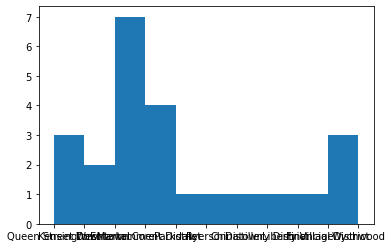

In [220]:
plt.hist(restaurants_lasvegas.neighborhood)

In [221]:
dummy_df = pd.get_dummies(restaurants_lasvegas['categories'].apply(pd.Series).stack()).sum(level =0)

C:\Users\raych\AppData\Local\Temp\ipykernel_1736\4289670488.py:1: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  dummy_df = pd.get_dummies(restaurants_lasvegas['categories'].apply(pd.Series).stack()).sum(level =0)
C:\Users\raych\AppData\Local\Temp\ipykernel_1736\4289670488.py:1: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  dummy_df = pd.get_dummies(restaurants_lasvegas['categories'].apply(pd.Series).stack()).sum(level =0)


In [222]:
restaurants_lasvegas = pd.concat([restaurants_lasvegas, dummy_df], axis = 1).drop(columns = 'categories')
restaurants_lasvegas

,business_id,name,neighborhood,address,city,state,postal_code,latitude,longitude,stars,...,Italian,Japanese,Korean,Mediterranean,Mexican,Nightlife,Seafood,Thai,Vegetarian,Vietnamese
0,B70iTJjcPkuYn8ouUewWgw,"""Gusto 101""",Queen Street West,"""101 Portland Street""",Toronto,ON,M5V 2N3,43.645002,-79.400309,4.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,e41TP5cXZqSrz50xCBJqZw,"""Insomnia Restaurant & Lounge""",Kensington Market,"""563 Bloor Street W""",Toronto,ON,M5S 1Y6,43.665131,-79.410852,4.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
2,h_4dPV9M9aYaBliH1Eoeeg,"""Wvrst""",Queen Street West,"""609 King Street W""",Toronto,ON,M5V 1M5,43.644186,-79.401015,4.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,RwRNR4z3kY-4OsFqigY5sw,"""Uncle Tetsu's Japanese Cheesecake""",Downtown Core,"""598 Bay Street""",Toronto,ON,M5G 1M5,43.655969,-79.384013,3.5,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,RtUvSWO_UZ8V3Wpj0n077w,"""KINKA IZAKAYA ORIGINAL""",Downtown Core,"""398 Church St""",Toronto,ON,M5B 2A2,43.660524,-79.378927,4.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
5,O-uIEuv7JLUHajkemx_sVw,"""Beerbistro""",Downtown Core,"""18 King Street E""",Toronto,ON,M5C 1C4,43.649817,-79.377147,4.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
6,mG71gQ5HWl7ut9OCN6NJKA,"""360 Restaurant""",Entertainment District,"""CN Tower, 301 Front Street W""",Toronto,ON,M5V 2T6,43.642768,-79.387100,3.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
7,mZRKH9ngRY92bI_irrHq6w,"""Richmond Station""",Downtown Core,"""1 Richmond Street W""",Toronto,ON,M5H 3W4,43.651373,-79.379285,4.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,MS-hfug4QDXqb_Mws3qlzA,"""Grand Electric""",Parkdale,"""1330 Queen Street W""",Toronto,ON,M6K 1L4,43.641675,-79.431608,4.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
9,DE89UdHFMCN6DtYWZuer5A,"""Hokkaido Ramen Santouka""",Ryerson,"""91 Dundas Street E""",Toronto,ON,M5B 2C8,43.656322,-79.377500,4.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Remove NAN values for restaurants`

In [223]:
restaurants_lasvegas.dropna(inplace = True)

Convert neighborhood to dummies

In [224]:

neighborhood_dummies = pd.get_dummies(restaurants_lasvegas.neighborhood,drop_first=True)
neighborhood_dummies

,Distillery District,Downtown Core,Entertainment District,Financial District,Kensington Market,Liberty Village,Parkdale,Queen Street West,Ryerson,Wychwood
0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0
3,0,1,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0
5,0,1,0,0,0,0,0,0,0,0
6,0,0,1,0,0,0,0,0,0,0
7,0,1,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,1,0,0,0
9,0,0,0,0,0,0,0,0,1,0


In [225]:
neighborhood_dummies.columns.to_list()

['Distillery District',
 'Downtown Core',
 'Entertainment District',
 'Financial District',
 'Kensington Market',
 'Liberty Village',
 'Parkdale',
 'Queen Street West',
 'Ryerson',
 'Wychwood']

In [226]:
# merge back dummies with dataset

restaurants_lasvegas = pd.concat([restaurants_lasvegas, neighborhood_dummies], axis = 1)
restaurants_lasvegas

,business_id,name,neighborhood,address,city,state,postal_code,latitude,longitude,stars,...,Distillery District,Downtown Core,Entertainment District,Financial District,Kensington Market,Liberty Village,Parkdale,Queen Street West,Ryerson,Wychwood
0,B70iTJjcPkuYn8ouUewWgw,"""Gusto 101""",Queen Street West,"""101 Portland Street""",Toronto,ON,M5V 2N3,43.645002,-79.400309,4.0,...,0,0,0,0,0,0,0,1,0,0
1,e41TP5cXZqSrz50xCBJqZw,"""Insomnia Restaurant & Lounge""",Kensington Market,"""563 Bloor Street W""",Toronto,ON,M5S 1Y6,43.665131,-79.410852,4.0,...,0,0,0,0,1,0,0,0,0,0
2,h_4dPV9M9aYaBliH1Eoeeg,"""Wvrst""",Queen Street West,"""609 King Street W""",Toronto,ON,M5V 1M5,43.644186,-79.401015,4.0,...,0,0,0,0,0,0,0,1,0,0
3,RwRNR4z3kY-4OsFqigY5sw,"""Uncle Tetsu's Japanese Cheesecake""",Downtown Core,"""598 Bay Street""",Toronto,ON,M5G 1M5,43.655969,-79.384013,3.5,...,0,1,0,0,0,0,0,0,0,0
4,RtUvSWO_UZ8V3Wpj0n077w,"""KINKA IZAKAYA ORIGINAL""",Downtown Core,"""398 Church St""",Toronto,ON,M5B 2A2,43.660524,-79.378927,4.0,...,0,1,0,0,0,0,0,0,0,0
5,O-uIEuv7JLUHajkemx_sVw,"""Beerbistro""",Downtown Core,"""18 King Street E""",Toronto,ON,M5C 1C4,43.649817,-79.377147,4.0,...,0,1,0,0,0,0,0,0,0,0
6,mG71gQ5HWl7ut9OCN6NJKA,"""360 Restaurant""",Entertainment District,"""CN Tower, 301 Front Street W""",Toronto,ON,M5V 2T6,43.642768,-79.387100,3.5,...,0,0,1,0,0,0,0,0,0,0
7,mZRKH9ngRY92bI_irrHq6w,"""Richmond Station""",Downtown Core,"""1 Richmond Street W""",Toronto,ON,M5H 3W4,43.651373,-79.379285,4.5,...,0,1,0,0,0,0,0,0,0,0
8,MS-hfug4QDXqb_Mws3qlzA,"""Grand Electric""",Parkdale,"""1330 Queen Street W""",Toronto,ON,M6K 1L4,43.641675,-79.431608,4.0,...,0,0,0,0,0,0,1,0,0,0
9,DE89UdHFMCN6DtYWZuer5A,"""Hokkaido Ramen Santouka""",Ryerson,"""91 Dundas Street E""",Toronto,ON,M5B 2C8,43.656322,-79.377500,4.0,...,0,0,0,0,0,0,0,0,1,0


In [227]:
# output restaurant data to restaurant_lasvegas.csv
#restaurants_lasvegas.to_csv('restaurant_data.csv')

(array([ 1.,  0.,  0.,  5.,  0.,  0., 13.,  0.,  0.,  4.]),
 array([3.  , 3.15, 3.3 , 3.45, 3.6 , 3.75, 3.9 , 4.05, 4.2 , 4.35, 4.5 ]),
 <BarContainer object of 10 artists>)

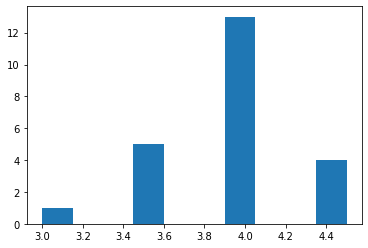

In [228]:
plt.hist(restaurants_lasvegas['stars'])

In [229]:
las_vegas_list = restaurants_lasvegas.business_id.unique().tolist()

In [230]:
lasvegas_reviews_df = reviews_df[reviews_df['business_id'].isin(las_vegas_list)]
lasvegas_reviews_df

,review_id,user_id,business_id,stars,date,text,useful,funny,cool
13,lsoSqIrrDbQvWpMvsSj2xw,u0LXt3Uea_GidxRW1xcsfg,RtUvSWO_UZ8V3Wpj0n077w,3,2012-12-03,Wanted to check out this place due to all the ...,2,1,1
19,WYDFJOBOl7cycd7gN-c_xA,u0LXt3Uea_GidxRW1xcsfg,zgQHtqX0gqMw1nlBZl2VnQ,1,2012-10-30,really excited to hear of this restaurant comi...,9,2,1
28,Enuk_DJbK0JPmgbFU8ePKw,u0LXt3Uea_GidxRW1xcsfg,N93EYZy9R0sdlEvubu94ig,3,2012-09-23,"Not sure what the hype is, but decided to give...",0,0,0
109,f17tpJXCwTE0M137d9yX6g,nOTl4aPC4tKHK35T3bNauQ,zgQHtqX0gqMw1nlBZl2VnQ,2,2013-10-19,"While I really enjoyed the noodles, their sign...",2,1,0
987,o2T_QEHsUPcdVrHBExmdfg,BytRWk8X1OelSgwwfXd8Aw,e41TP5cXZqSrz50xCBJqZw,5,2016-03-15,The 5-star rating goes to their home fries! If...,0,0,0
...,...,...,...,...,...,...,...,...,...
5259041,Jq3HfwZG3VSwV1xyZuxZjg,icDRgopfmkx_7S1wLeUNnw,r_BrIgzYcwo1NAuG9dLbpg,5,2016-08-03,This is soo annoying http:\/\/VisitEarnings.co...,0,0,0
5259135,DC4rkzSceiOcC-9k3lrJYQ,IV2ww2NsCbZmm-ZDNT-sgQ,e41TP5cXZqSrz50xCBJqZw,5,2016-11-28,One of my favourite spots in Annex. They have ...,0,0,0
5259251,I5HOJKHWAoKA8He9WjyW2w,iBsBBmFGGg_SS06Iz4Hyjg,r_BrIgzYcwo1NAuG9dLbpg,4,2014-09-01,This place is a treat! I've tried sabai sabai ...,1,0,0
5259384,07tgtsglJjaVv9SpQCqh9w,gsDU_aA70aX3oP9EwJiuTw,r_BrIgzYcwo1NAuG9dLbpg,3,2015-12-01,A little bit too loud and hipster-y for my tas...,0,0,0


In [231]:
lasvegas_reviews_df['stars'] = lasvegas_reviews_df['stars'].apply(lambda x: 1 if x >= 4 else 0)
lasvegas_reviews_df

C:\Users\raych\AppData\Local\Temp\ipykernel_1736\897761436.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lasvegas_reviews_df['stars'] = lasvegas_reviews_df['stars'].apply(lambda x: 1 if x >= 4 else 0)


,review_id,user_id,business_id,stars,date,text,useful,funny,cool
13,lsoSqIrrDbQvWpMvsSj2xw,u0LXt3Uea_GidxRW1xcsfg,RtUvSWO_UZ8V3Wpj0n077w,0,2012-12-03,Wanted to check out this place due to all the ...,2,1,1
19,WYDFJOBOl7cycd7gN-c_xA,u0LXt3Uea_GidxRW1xcsfg,zgQHtqX0gqMw1nlBZl2VnQ,0,2012-10-30,really excited to hear of this restaurant comi...,9,2,1
28,Enuk_DJbK0JPmgbFU8ePKw,u0LXt3Uea_GidxRW1xcsfg,N93EYZy9R0sdlEvubu94ig,0,2012-09-23,"Not sure what the hype is, but decided to give...",0,0,0
109,f17tpJXCwTE0M137d9yX6g,nOTl4aPC4tKHK35T3bNauQ,zgQHtqX0gqMw1nlBZl2VnQ,0,2013-10-19,"While I really enjoyed the noodles, their sign...",2,1,0
987,o2T_QEHsUPcdVrHBExmdfg,BytRWk8X1OelSgwwfXd8Aw,e41TP5cXZqSrz50xCBJqZw,1,2016-03-15,The 5-star rating goes to their home fries! If...,0,0,0
...,...,...,...,...,...,...,...,...,...
5259041,Jq3HfwZG3VSwV1xyZuxZjg,icDRgopfmkx_7S1wLeUNnw,r_BrIgzYcwo1NAuG9dLbpg,1,2016-08-03,This is soo annoying http:\/\/VisitEarnings.co...,0,0,0
5259135,DC4rkzSceiOcC-9k3lrJYQ,IV2ww2NsCbZmm-ZDNT-sgQ,e41TP5cXZqSrz50xCBJqZw,1,2016-11-28,One of my favourite spots in Annex. They have ...,0,0,0
5259251,I5HOJKHWAoKA8He9WjyW2w,iBsBBmFGGg_SS06Iz4Hyjg,r_BrIgzYcwo1NAuG9dLbpg,1,2014-09-01,This place is a treat! I've tried sabai sabai ...,1,0,0
5259384,07tgtsglJjaVv9SpQCqh9w,gsDU_aA70aX3oP9EwJiuTw,r_BrIgzYcwo1NAuG9dLbpg,0,2015-12-01,A little bit too loud and hipster-y for my tas...,0,0,0


(array([ 4791.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 12573.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

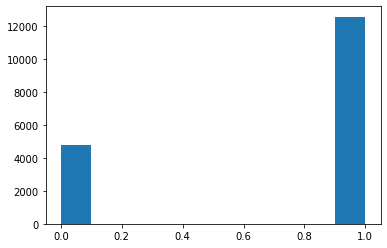

In [232]:
plt.hist(lasvegas_reviews_df['stars'])

## Combine reviews with business categories

In [233]:
restaurants_lasvegas

,business_id,name,neighborhood,address,city,state,postal_code,latitude,longitude,stars,...,Distillery District,Downtown Core,Entertainment District,Financial District,Kensington Market,Liberty Village,Parkdale,Queen Street West,Ryerson,Wychwood
0,B70iTJjcPkuYn8ouUewWgw,"""Gusto 101""",Queen Street West,"""101 Portland Street""",Toronto,ON,M5V 2N3,43.645002,-79.400309,4.0,...,0,0,0,0,0,0,0,1,0,0
1,e41TP5cXZqSrz50xCBJqZw,"""Insomnia Restaurant & Lounge""",Kensington Market,"""563 Bloor Street W""",Toronto,ON,M5S 1Y6,43.665131,-79.410852,4.0,...,0,0,0,0,1,0,0,0,0,0
2,h_4dPV9M9aYaBliH1Eoeeg,"""Wvrst""",Queen Street West,"""609 King Street W""",Toronto,ON,M5V 1M5,43.644186,-79.401015,4.0,...,0,0,0,0,0,0,0,1,0,0
3,RwRNR4z3kY-4OsFqigY5sw,"""Uncle Tetsu's Japanese Cheesecake""",Downtown Core,"""598 Bay Street""",Toronto,ON,M5G 1M5,43.655969,-79.384013,3.5,...,0,1,0,0,0,0,0,0,0,0
4,RtUvSWO_UZ8V3Wpj0n077w,"""KINKA IZAKAYA ORIGINAL""",Downtown Core,"""398 Church St""",Toronto,ON,M5B 2A2,43.660524,-79.378927,4.0,...,0,1,0,0,0,0,0,0,0,0
5,O-uIEuv7JLUHajkemx_sVw,"""Beerbistro""",Downtown Core,"""18 King Street E""",Toronto,ON,M5C 1C4,43.649817,-79.377147,4.0,...,0,1,0,0,0,0,0,0,0,0
6,mG71gQ5HWl7ut9OCN6NJKA,"""360 Restaurant""",Entertainment District,"""CN Tower, 301 Front Street W""",Toronto,ON,M5V 2T6,43.642768,-79.387100,3.5,...,0,0,1,0,0,0,0,0,0,0
7,mZRKH9ngRY92bI_irrHq6w,"""Richmond Station""",Downtown Core,"""1 Richmond Street W""",Toronto,ON,M5H 3W4,43.651373,-79.379285,4.5,...,0,1,0,0,0,0,0,0,0,0
8,MS-hfug4QDXqb_Mws3qlzA,"""Grand Electric""",Parkdale,"""1330 Queen Street W""",Toronto,ON,M6K 1L4,43.641675,-79.431608,4.0,...,0,0,0,0,0,0,1,0,0,0
9,DE89UdHFMCN6DtYWZuer5A,"""Hokkaido Ramen Santouka""",Ryerson,"""91 Dundas Street E""",Toronto,ON,M5B 2C8,43.656322,-79.377500,4.0,...,0,0,0,0,0,0,0,0,1,0


In [234]:
lasvegas_reviews_df = lasvegas_reviews_df.merge(restaurants_lasvegas, how = "inner", on='business_id')
lasvegas_reviews_df


,review_id,user_id,business_id,stars_x,date,text,useful,funny,cool,name,...,Distillery District,Downtown Core,Entertainment District,Financial District,Kensington Market,Liberty Village,Parkdale,Queen Street West,Ryerson,Wychwood
0,lsoSqIrrDbQvWpMvsSj2xw,u0LXt3Uea_GidxRW1xcsfg,RtUvSWO_UZ8V3Wpj0n077w,0,2012-12-03,Wanted to check out this place due to all the ...,2,1,1,"""KINKA IZAKAYA ORIGINAL""",...,0,1,0,0,0,0,0,0,0,0
1,wOeJmJvQqvWM_hk2Ao2FLQ,kaF1l8dA7q-qL8ds1KUedQ,RtUvSWO_UZ8V3Wpj0n077w,1,2015-03-03,its delicious. its loud. its funny. seems like...,1,1,1,"""KINKA IZAKAYA ORIGINAL""",...,0,1,0,0,0,0,0,0,0,0
2,6TPQNYqfragIrimGFKK7_g,AQJauQ3Q8aeEQc9DHzcpXg,RtUvSWO_UZ8V3Wpj0n077w,1,2017-05-20,Love this place! If I ever have international ...,0,0,0,"""KINKA IZAKAYA ORIGINAL""",...,0,1,0,0,0,0,0,0,0,0
3,YSNO1rTbyCmmuKpgbmCUCQ,G3civyLatxrzYk0lln3MUQ,RtUvSWO_UZ8V3Wpj0n077w,1,2017-08-29,This place can accumulate some line up so come...,0,0,0,"""KINKA IZAKAYA ORIGINAL""",...,0,1,0,0,0,0,0,0,0,0
4,hGMsoRk2nbGf0o3dV-_eOA,MPi7IfzQtXW3PfSNAbzO-A,RtUvSWO_UZ8V3Wpj0n077w,0,2013-05-08,Came here with a few friends right after my la...,0,0,1,"""KINKA IZAKAYA ORIGINAL""",...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17359,_qFB1ASgVHUsnGc-XRv0Ow,FVx3h7E0ut7XByoEPFyvJw,a8pmtlVKf7NiSLI-4KejIw,1,2017-10-03,Very nice restaurant....and ask for keziah ......,0,0,0,"""El Catrin Destileria""",...,1,0,0,0,0,0,0,0,0,0
17360,3YauutbUaoKRVKtRNj87_Q,AhhwdUW8utwJSzG3UCb8nw,a8pmtlVKf7NiSLI-4KejIw,1,2013-08-21,"We had the guacamole, seafood burrito, taco Ba...",0,0,0,"""El Catrin Destileria""",...,1,0,0,0,0,0,0,0,0,0
17361,BNzkup-etLnvp1hnEG4fxw,TJ-lPouEMb0i8c2wpl8CpQ,a8pmtlVKf7NiSLI-4KejIw,0,2013-12-05,My boyfriend and I wandered in as we were stuc...,1,0,0,"""El Catrin Destileria""",...,1,0,0,0,0,0,0,0,0,0
17362,2zt777d4BjDuyKjGkTQLUw,UoNEitmZyw8uw_MXDLjo9w,a8pmtlVKf7NiSLI-4KejIw,1,2016-10-31,Amazing decoration - great ambiance. A Mexican...,0,0,1,"""El Catrin Destileria""",...,1,0,0,0,0,0,0,0,0,0


## Adding users features

In [235]:
len(lasvegas_reviews_df.user_id.unique())

11293

In [110]:
users_df = pd.read_csv('yelp_user.csv')
users_df

,user_id,name,review_count,yelping_since,friends,useful,funny,cool,fans,elite,...,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
0,JJ-aSuM4pCFPdkfoZ34q0Q,Chris,10,2013-09-24,"0njfJmB-7n84DlIgUByCNw, rFn3Xe3RqHxRSxWOU19Gpg...",0,0,0,0,None,...,0,0,0,0,0,0,0,0,0,0
1,uUzsFQn_6cXDh6rPNGbIFA,Tiffy,1,2017-03-02,None,0,0,0,0,None,...,0,0,0,0,0,0,0,0,0,0
2,mBneaEEH5EMyxaVyqS-72A,Mark,6,2015-03-13,None,0,0,0,0,None,...,0,0,0,0,0,0,0,0,0,0
3,W5mJGs-dcDWRGEhAzUYtoA,Evelyn,3,2016-09-08,None,0,0,0,0,None,...,0,0,0,0,0,0,0,0,0,0
4,4E8--zUZO1Rr1IBK4_83fg,Lisa,11,2012-07-16,None,4,0,0,0,None,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1326095,LODBIwiAcKxRi7Wz-sFsKw,Neth,1,2015-02-21,None,0,0,0,0,None,...,0,0,0,0,0,0,0,0,0,0
1326096,JpY2ozlb30z_AZCq2YX34g,Mike,1,2014-08-01,None,2,0,0,0,None,...,0,0,0,0,0,0,0,0,0,1
1326097,AU9aZSA1rAjNE5cFcZTVMA,Jalin,12,2015-11-11,None,0,0,0,0,None,...,0,0,0,0,0,0,0,0,0,0
1326098,s1BZ7-rpqb3xRKcxvArXsQ,Cindy,33,2014-06-28,None,5,0,0,0,None,...,0,0,0,0,0,1,0,0,0,0


In [236]:
users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1326100 entries, 0 to 1326099
Data columns (total 22 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   user_id             1326100 non-null  object 
 1   name                1325603 non-null  object 
 2   review_count        1326100 non-null  int64  
 3   yelping_since       1326100 non-null  object 
 4   friends             1326100 non-null  object 
 5   useful              1326100 non-null  int64  
 6   funny               1326100 non-null  int64  
 7   cool                1326100 non-null  int64  
 8   fans                1326100 non-null  int64  
 9   elite               1326100 non-null  object 
 10  average_stars       1326100 non-null  float64
 11  compliment_hot      1326100 non-null  int64  
 12  compliment_more     1326100 non-null  int64  
 13  compliment_profile  1326100 non-null  int64  
 14  compliment_cute     1326100 non-null  int64  
 15  compliment_list

#### Calculate standard deviation of stars

In [237]:
reviews_grouped_std = reviews_df.groupby('user_id')['stars'].std()

In [238]:
reviews_grouped_std = reviews_grouped_std.dropna()

In [239]:
reviews_grouped_std = reviews_grouped_std[reviews_grouped_std != 0]
reviews_grouped_std

user_id
---1lKK3aKOuomHnwAkAow    1.376859
---PLwSf5gKdIoVnyRHgBA    1.414214
---cu1hq55BP9DWVXXKHZg    1.732051
---udAKDsn0yQXmzbWQNSw    0.707107
--0kuuLmuYBe3Rmu0Iycww    1.435481
                            ...   
zzwTJAgONYCTeJia4te47g    0.577350
zzx7k7JqCQNhhqL4VJxL0A    1.414214
zzxZoMmjbUjXcWZzrE3PIw    0.816497
zzyMMeUZzKAy7KQhM7lU2w    2.828427
zzzAgDDWe4PTnJuwhi3XQQ    0.707107
Name: stars, Length: 479104, dtype: float64

In [240]:
user_std_df = pd.DataFrame({'user_id': reviews_grouped_std.index, 'stars_stddev': reviews_grouped_std.values})
user_std_df

,user_id,stars_stddev
0,---1lKK3aKOuomHnwAkAow,1.376859
1,---PLwSf5gKdIoVnyRHgBA,1.414214
2,---cu1hq55BP9DWVXXKHZg,1.732051
3,---udAKDsn0yQXmzbWQNSw,0.707107
4,--0kuuLmuYBe3Rmu0Iycww,1.435481
...,...,...
479099,zzwTJAgONYCTeJia4te47g,0.577350
479100,zzx7k7JqCQNhhqL4VJxL0A,1.414214
479101,zzxZoMmjbUjXcWZzrE3PIw,0.816497
479102,zzyMMeUZzKAy7KQhM7lU2w,2.828427


Calculate average of stars

In [241]:
reviews_grouped_avg = reviews_df.groupby('user_id')['stars'].mean()
user_avg_df = pd.DataFrame({'user_id': reviews_grouped_avg.index, 'stars_avg': reviews_grouped_avg.values})
user_avg_df

,user_id,stars_avg
0,---1lKK3aKOuomHnwAkAow,4.05042
1,---94vtJ_5o_nikEs6hUjg,5.00000
2,---PLwSf5gKdIoVnyRHgBA,4.00000
3,---cu1hq55BP9DWVXXKHZg,2.00000
4,---fhiwiwBYrvqhpXgcWDQ,1.00000
...,...,...
1326096,zzzPVqSxSvjzlLR3Q7wsUw,5.00000
1326097,zzzTkKLFo9CaeZnfO4TvzA,1.00000
1326098,zzzfcCWPDkg-kGVpqCKCEg,5.00000
1326099,zzzhFxwfzL56CQVnw8piTw,5.00000


In [242]:
user_std_df = user_std_df.merge(user_avg_df, how = "inner", on = 'user_id')

In [243]:
lasvegas_reviews_df = lasvegas_reviews_df.merge(user_std_df, how = "inner", on = 'user_id')
#lasvegas_reviews_df

In [244]:
#lasvegas_reviews_df.to_csv('lasvegas_reviews_with_star_features.csv')

In [245]:
lasvegas_reviews_df.columns

Index(['review_id', 'user_id', 'business_id', 'stars_x', 'date', 'text',
       'useful', 'funny', 'cool', 'name', 'neighborhood', 'address', 'city',
       'state', 'postal_code', 'latitude', 'longitude', 'stars_y',
       'review_count', 'is_open', 'American', 'Asian Fusion', 'Bakeries',
       'Bars', 'Breakfast & Brunch', 'Canadian', 'Chinese', 'Desserts',
       'German', 'Italian', 'Japanese', 'Korean', 'Mediterranean', 'Mexican',
       'Nightlife', 'Seafood', 'Thai', 'Vegetarian', 'Vietnamese',
       'Distillery District', 'Downtown Core', 'Entertainment District',
       'Financial District', 'Kensington Market', 'Liberty Village',
       'Parkdale', 'Queen Street West', 'Ryerson', 'Wychwood', 'stars_stddev',
       'stars_avg'],
      dtype='object')

In [246]:
lasvegas_reviews_df.neighborhood.unique().tolist()

['Downtown Core',
 'Financial District',
 'Queen Street West',
 'Kensington Market',
 'Wychwood',
 'Entertainment District',
 'Parkdale',
 'Ryerson',
 'Distillery District',
 'Liberty Village',
 'Chinatown']

In [247]:
lasvegas_reviews_df = lasvegas_reviews_df.rename(
    columns={
        'stars_x': 'stars'
    }
)
# Define relevant columns
cuisine_cols = [
    'American',
    'Asian Fusion',
    'Bakeries',
    'Bars',
    'Breakfast & Brunch',
    'British',
    'Buffets',
    'Burgers',
    'Cafes',
    'Caterers',
    'Chinese',
    'Desserts',
    'French',
    'Italian',
    'Japanese',
    'Korean',
    'Mexican',
    'Music Venues',
    'Nightlife',
    'Salad',
    'Seafood',
    'Thai',
    'Vietnamese'
]
remove_cols = ['British', 'Buffets', 'Burgers', 'Cafes', 'Caterers', 'French', 'Music Venues', 'Salad']
cuisine_cols = [x for x in cuisine_cols if x not in remove_cols]

neighborhood_cols = ['Downtown Core',
 'Financial District',
 'Queen Street West',
 'Kensington Market',
 'Wychwood',
 'Entertainment District',
 'Parkdale',
 'Ryerson',
 'Distillery District',
 'Liberty Village',]



user_cols = [
    'stars_stddev',
    'stars_avg'
]
relevant_cols = [
    'review_id',
    'user_id',
    'business_id',
    'stars',
    'date',
    'text',
    'name',
    'address'
]
# Extract relevant columns
lasvegas_reviews_df = lasvegas_reviews_df[relevant_cols + cuisine_cols + neighborhood_cols + user_cols]

In [248]:
# Dictionary to define aggregations, we want to sum up over cuisine
agg_dict = dict([(cuisine, 'sum') for cuisine in cuisine_cols])
agg_dict['review_id'] = 'count'
# Aggregate reviews per cuisine per user
user_cuisine_features_df = lasvegas_reviews_df.groupby(
    'user_id'
).agg(
    agg_dict
)
# Calculate ratio of cuisine over total reviews
for cuisine in cuisine_cols:
    user_cuisine_features_df[cuisine + '_ratio'] = user_cuisine_features_df[cuisine] / user_cuisine_features_df['review_id']
user_cuisine_features_df = user_cuisine_features_df.drop(
    columns=['review_id']
)
# Rename columns
user_rename_dict = dict([(cuisine, 'user_' + cuisine) for cuisine in cuisine_cols] + [(cuisine + '_ratio', 'user_' + cuisine + '_ratio') for cuisine in cuisine_cols])
user_cuisine_features_df = user_cuisine_features_df.rename(
    columns=user_rename_dict
)
user_cuisine_features_df.head()

,user_American,user_Asian Fusion,user_Bakeries,user_Bars,user_Breakfast & Brunch,user_Chinese,user_Desserts,user_Italian,user_Japanese,user_Korean,...,user_Chinese_ratio,user_Desserts_ratio,user_Italian_ratio,user_Japanese_ratio,user_Korean_ratio,user_Mexican_ratio,user_Nightlife_ratio,user_Seafood_ratio,user_Thai_ratio,user_Vietnamese_ratio
user_id,,,,,,,,,,,,,,,,,,,,,
--BumyUHiO_7YsHurb9Hkw,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.25,0.0,0.25,0.25,0.25
--Qh8yKWAvIP4V4K8ZPfHA,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,...,0.2,0.0,0.0,0.2,0.2,0.00,0.2,0.00,0.40,0.20
--YhjyV-ce1nFLYxP49C5A,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.2,0.0,0.00,0.2,0.00,0.60,0.00
-00AazqEBd6ZK1lgsbatyA,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.00
-0jN99BBgMyJz7N3RetvAg,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.00,0.0,0.00,0.00,0.00


In [249]:
# Merge to review table
lasvegas_reviews_user_features_df = lasvegas_reviews_df.merge(user_cuisine_features_df, how='left', on='user_id')
# Rename columns
arm_rename_dict = dict([(cuisine, 'arm_' + cuisine) for cuisine in cuisine_cols])
lasvegas_reviews_user_features_df = lasvegas_reviews_user_features_df.rename(
    columns=arm_rename_dict
)
lasvegas_reviews_user_features_df.head()

,review_id,user_id,business_id,stars,date,text,name,address,arm_American,arm_Asian Fusion,...,user_Chinese_ratio,user_Desserts_ratio,user_Italian_ratio,user_Japanese_ratio,user_Korean_ratio,user_Mexican_ratio,user_Nightlife_ratio,user_Seafood_ratio,user_Thai_ratio,user_Vietnamese_ratio
0,lsoSqIrrDbQvWpMvsSj2xw,u0LXt3Uea_GidxRW1xcsfg,RtUvSWO_UZ8V3Wpj0n077w,0,2012-12-03,Wanted to check out this place due to all the ...,"""KINKA IZAKAYA ORIGINAL""","""398 Church St""",0.0,0.0,...,0.333333,0.0,0.0,0.666667,0.333333,0.00,0.333333,0.00,0.00,0.333333
1,WYDFJOBOl7cycd7gN-c_xA,u0LXt3Uea_GidxRW1xcsfg,zgQHtqX0gqMw1nlBZl2VnQ,0,2012-10-30,really excited to hear of this restaurant comi...,"""Momofuku Noodle Bar""","""190 University Avenue, Ground Floor""",1.0,1.0,...,0.333333,0.0,0.0,0.666667,0.333333,0.00,0.333333,0.00,0.00,0.333333
2,Enuk_DJbK0JPmgbFU8ePKw,u0LXt3Uea_GidxRW1xcsfg,N93EYZy9R0sdlEvubu94ig,0,2012-09-23,"Not sure what the hype is, but decided to give...","""Banh Mi Boys""","""392 Queen Street W""",0.0,1.0,...,0.333333,0.0,0.0,0.666667,0.333333,0.00,0.333333,0.00,0.00,0.333333
3,6TPQNYqfragIrimGFKK7_g,AQJauQ3Q8aeEQc9DHzcpXg,RtUvSWO_UZ8V3Wpj0n077w,1,2017-05-20,Love this place! If I ever have international ...,"""KINKA IZAKAYA ORIGINAL""","""398 Church St""",0.0,0.0,...,0.000000,0.0,0.0,1.000000,0.000000,0.00,1.000000,0.00,0.00,0.000000
4,YSNO1rTbyCmmuKpgbmCUCQ,G3civyLatxrzYk0lln3MUQ,RtUvSWO_UZ8V3Wpj0n077w,1,2017-08-29,This place can accumulate some line up so come...,"""KINKA IZAKAYA ORIGINAL""","""398 Church St""",0.0,0.0,...,0.000000,0.0,0.0,0.500000,0.000000,0.25,0.250000,0.25,0.25,0.000000


In [250]:
len(lasvegas_reviews_user_features_df.business_id.unique())

23

In [201]:
lasvegas_reviews_user_features_df.to_csv('toronto_reviews_all_features.csv')